In [1]:
import pandas as pd
import numpy as np

In [2]:
#read data train
credit_risk_train = pd.read_csv('home-credit-default-risk/application_train.csv')

In [3]:
credit_risk_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
credit_risk_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
#This is prepocessing
#for choosing unused column
unused_columns =[
    "SK_ID_CURR",  #id
    
    "OWN_CAR_AGE", "EXT_SOURCE_1", "APARTMENTS_AVG", "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG", 
    "YEARS_BUILD_AVG", "COMMONAREA_AVG", "ELEVATORS_AVG", "ENTRANCES_AVG", "FLOORSMAX_AVG", 
    "FLOORSMIN_AVG", "LANDAREA_AVG", "LIVINGAPARTMENTS_AVG", "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG", 
    "NONLIVINGAREA_AVG", "APARTMENTS_MODE", "BASEMENTAREA_MODE", "YEARS_BEGINEXPLUATATION_MODE", 
    "YEARS_BUILD_MODE", "COMMONAREA_MODE", "ELEVATORS_MODE", "ENTRANCES_MODE","FLOORSMAX_MODE", 
    "FLOORSMIN_MODE", "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE", "LIVINGAREA_MODE", 
    "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE", "APARTMENTS_MEDI", "BASEMENTAREA_MEDI", 
    "YEARS_BEGINEXPLUATATION_MEDI", "YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI", 
    "ENTRANCES_MEDI", "FLOORSMAX_MEDI", "FLOORSMIN_MEDI", "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI", 
    "LIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI", "FONDKAPREMONT_MODE",
    "HOUSETYPE_MODE", "TOTALAREA_MODE", "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE", "FLAG_MOBIL",
]

In [6]:
train = credit_risk_train.loc[:, ~credit_risk_train.columns.isin(unused_columns)].reset_index()

In [7]:
#Handling Missing Value
train["CODE_GENDER"] = train["CODE_GENDER"].replace("XNA",np.nan)
train["NAME_FAMILY_STATUS"] = train["NAME_FAMILY_STATUS"].replace("Unknown", np.nan)
train["OCCUPATION_TYPE"] = train["OCCUPATION_TYPE"].replace("XNA", np.nan)

In [8]:
drop_columns = [
    "NAME_CONTRACT_TYPE", "CODE_GENDER", "NAME_FAMILY_STATUS", 
    "CNT_FAM_MEMBERS", "DAYS_LAST_PHONE_CHANGE"
]

train.dropna(subset=drop_columns, inplace=True)
train.reset_index(drop=True, inplace=True)

In [9]:
#imputation of missing value
from sklearn.impute import SimpleImputer

In [10]:
imputation_mode = SimpleImputer(strategy='most_frequent')
imputation_median = SimpleImputer(strategy='median')
imputation_mean = SimpleImputer(strategy='mean')

attr_mode = ["NAME_TYPE_SUITE"]
attr_median = ["AMT_ANNUITY", "AMT_GOODS_PRICE", "OBS_30_CNT_SOCIAL_CIRCLE", 
               "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", 
               "DEF_60_CNT_SOCIAL_CIRCLE", "AMT_REQ_CREDIT_BUREAU_HOUR", 
               "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", 
               "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", 
               "AMT_REQ_CREDIT_BUREAU_YEAR"]
attr_mean = ["EXT_SOURCE_2", "EXT_SOURCE_3"]

attr_implementation = {'mode': [imputation_mode, attr_mode],
            'median': [imputation_median, attr_median],
            'mean': [imputation_mean, attr_mean]}

for a in attr_implementation.values():
    for attr in a[1]:
        train[attr] = a[0].fit_transform(train[[attr]])

In [11]:
categorical_columns = [col for col in train.select_dtypes(include='object')]
train[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307504 entries, 0 to 307503
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   NAME_CONTRACT_TYPE          307504 non-null  object
 1   CODE_GENDER                 307504 non-null  object
 2   FLAG_OWN_CAR                307504 non-null  object
 3   FLAG_OWN_REALTY             307504 non-null  object
 4   NAME_TYPE_SUITE             307504 non-null  object
 5   NAME_INCOME_TYPE            307504 non-null  object
 6   NAME_EDUCATION_TYPE         307504 non-null  object
 7   NAME_FAMILY_STATUS          307504 non-null  object
 8   NAME_HOUSING_TYPE           307504 non-null  object
 9   OCCUPATION_TYPE             211116 non-null  object
 10  WEEKDAY_APPR_PROCESS_START  307504 non-null  object
 11  ORGANIZATION_TYPE           307504 non-null  object
dtypes: object(12)
memory usage: 28.2+ MB


In [12]:
#encoding
from sklearn.preprocessing import StandardScaler

In [13]:
education_encoder={
    None: 0,
    "Lower secondary": 1,
    "Secondary / secondary special": 2,
    "Incomplete higher": 3,
    "Higher education": 4,
    "Academic degree": 4
}
train["NAME_EDUCATION_TYPE"] = train["NAME_EDUCATION_TYPE"].replace(education_encoder)

In [14]:
onehot = pd.get_dummies(train[[x for x in categorical_columns if x != "NAME_EDUCATION_TYPE"]], drop_first=True)
onehot.head(8)

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Standarization
numerical_columns = [col for col in train.columns.tolist() if col not in categorical_columns + ["TARGET"]]
ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(train[numerical_columns]), columns=numerical_columns)
std.head()

,index,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-1.732067,-0.577538,0.142133,-0.478100,-0.166147,-0.507241,-0.149444,1.506903,-0.456222,0.379844,...,-0.090517,-0.024402,-0.022529,-0.018305,-0.070988,-0.058767,-0.155839,-0.269943,-0.30862,-0.440918
1,-1.732056,-0.577538,0.426793,1.725427,0.592673,1.600855,-1.252737,-0.166804,-0.460122,1.078703,...,-0.090517,-0.024402,-0.022529,-0.018305,-0.070988,-0.058767,-0.155839,-0.269943,-0.30862,-1.007325
2,-1.732044,-0.577538,-0.427188,-1.152887,-1.404662,-1.092146,-0.783440,-0.689493,-0.453306,0.206123,...,-0.090517,-0.024402,-0.022529,-0.018305,-0.070988,-0.058767,-0.155839,-0.269943,-0.30862,-1.007325
3,-1.732033,-0.577538,-0.142527,-0.711433,0.177868,-0.653467,-0.928979,-0.680098,-0.473224,-1.375818,...,-0.090517,-0.024402,-0.022529,-0.018305,-0.070988,-0.058767,-0.155839,-0.269943,-0.30862,-0.440918
4,-1.732022,-0.577538,-0.199459,-0.213741,-0.361751,-0.068562,0.563574,-0.892520,-0.473217,0.191646,...,-0.090517,-0.024402,-0.022529,-0.018305,-0.070988,-0.058767,-0.155839,-0.269943,-0.30862,-1.007325


In [16]:
#preprocessing data model
from sklearn.model_selection import train_test_split, cross_val_score

In [17]:
data_model = pd.concat([onehot, std, train["TARGET"]], axis=1)

In [18]:
#train test split
X = data_model.drop("TARGET", axis=1)
y = data_model["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape

((246003, 165), (61501, 165))

In [19]:
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [20]:
#built model use XGB Classifier
xgb = XGBClassifier(random_state=40)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=40, ...)

In [21]:
y_pred = xgb.predict(X_test)
print('XGB Classifier Model report:')
print(classification_report(y_test, y_pred))

y_pred_prob = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob)
print('Score ROC_AUC: ',roc_auc_xgb)

XGB Classifier Model report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56536
           1       0.45      0.03      0.05      4965

    accuracy                           0.92     61501
   macro avg       0.68      0.51      0.50     61501
weighted avg       0.88      0.92      0.88     61501

Score ROC_AUC:  0.7460765349665003


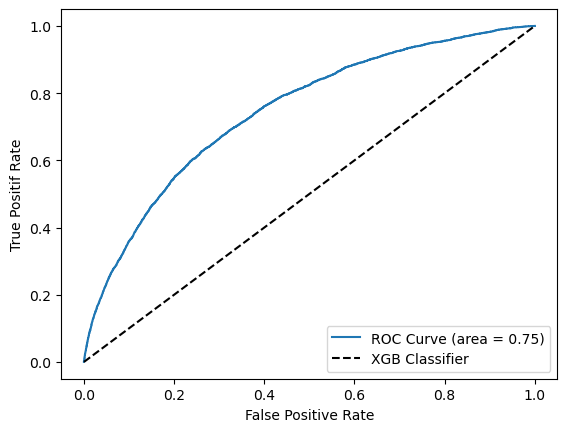

In [22]:
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' %roc_auc_xgb)
plt.plot([0,1],[0,1], 'k--', label='XGB Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positif Rate')
plt.legend(loc='lower right')
plt.show()

In [23]:
#built model use Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [24]:
y_pred = gnb.predict(X_test)
print('Gaussian Naive Bayes Model report:')
print(classification_report(y_test, y_pred))

y_pred_prob = gnb.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc_gnb = roc_auc_score(y_test, y_pred_prob)
print('Score ROC_AUC: ',roc_auc_gnb)

Gaussian Naive Bayes Model report:
              precision    recall  f1-score   support

           0       0.96      0.06      0.12     56536
           1       0.08      0.97      0.15      4965

    accuracy                           0.13     61501
   macro avg       0.52      0.52      0.13     61501
weighted avg       0.89      0.13      0.12     61501

Score ROC_AUC:  0.5786886531032068


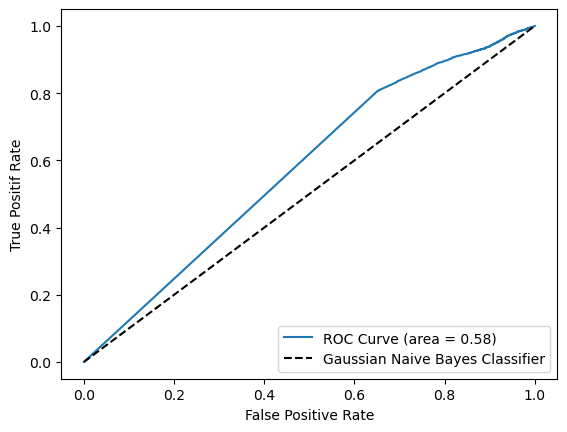

In [25]:
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' %roc_auc_gnb)
plt.plot([0,1],[0,1], 'k--', label='Gaussian Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positif Rate')
plt.legend(loc='lower right')
plt.show()

In [26]:
#built model use decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
y_pred = dt.predict(X_test)
print('Decision Tree Model report:')
print(classification_report(y_test, y_pred))

y_pred_prob = dt.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc_dt = roc_auc_score(y_test, y_pred_prob)
print('Score ROC_AUC: ',roc_auc_dt)

Decision Tree Model report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     56536
           1       0.14      0.16      0.15      4965

    accuracy                           0.85     61501
   macro avg       0.53      0.54      0.54     61501
weighted avg       0.86      0.85      0.86     61501

Score ROC_AUC:  0.5384103914182922


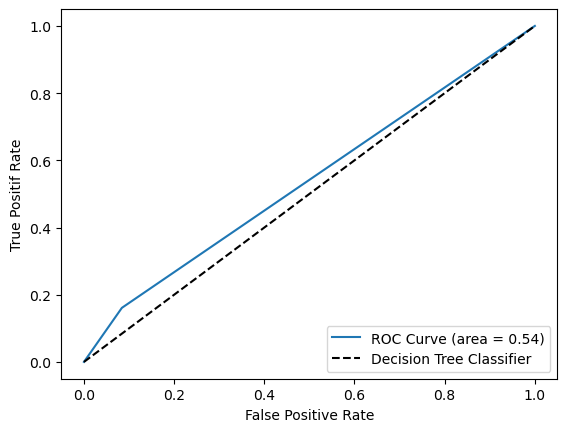

In [28]:
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' %roc_auc_dt)
plt.plot([0,1],[0,1], 'k--', label='Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positif Rate')
plt.legend(loc='lower right')
plt.show()

In [29]:
#built model use Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = rf.predict(X_test)
print('Random Forest Model Report:')
print(classification_report(y_test, y_pred))

y_pred_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob)
print('Score ROC_AUC: ',roc_auc_rf)

Random Forest Model Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56536
           1       0.67      0.00      0.00      4965

    accuracy                           0.92     61501
   macro avg       0.79      0.50      0.48     61501
weighted avg       0.90      0.92      0.88     61501

Score ROC_AUC:  0.7095974032747415


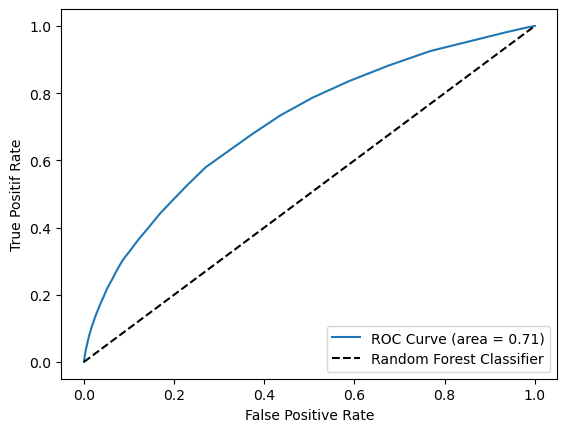

In [31]:
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' %roc_auc_rf)
plt.plot([0,1],[0,1], 'k--', label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positif Rate')
plt.legend(loc='lower right')
plt.show()

In [32]:
#Save the best model
import pickle

In [33]:
pickle.dump(rf, open('credit_risk_prediction.pkl', 'wb'))